<h1> GradeSheet Project </h1>

<h3> <font color = blue>1.1 Importing the libraries</font> </h3>

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pathlib

In [2]:
roster = pd.read_csv("roster.csv",
    converters={"NetID": str.lower, "Email Address": str.lower},
    usecols=["Section", "Email Address", "NetID"],
    index_col="NetID")


In [3]:
roster

,Email Address,Section
NetID,,
wxb12345,woody.barrera_jr@univ.edu,1
mxl12345,malaika.lambert@univ.edu,2
txj12345,traci.joyce@univ.edu,1
jgf12345,john.g.2.flower@univ.edu,3
smj00936,stacy.johnson@univ.edu,2
...,...,...
pmj37756,paul.johnson@univ.edu,3
dsl24347,danielle.lee@univ.edu,3
nxe44872,nicole.edwards@univ.edu,3


In [4]:
hw_exam_grades = pd.read_csv("hw_exam_grades.csv",
    converters={"SID": str.lower},
    usecols=lambda x: "Submission" not in x,
    index_col="SID")

In [5]:
hw_exam_grades

,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,Homework 4,Homework 4 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
SID,,,,,,,,,,,,,,,,,,,,,
axl60952,Aaron,Lester,68.0,80,74,80,77,80,89,100,...,42,60,41,60,79,100,63,100,68,100
amc28428,Adam,Cooper,80.0,80,78,80,78,80,87,100,...,45,60,53,60,65,100,63,100,90,100
axc64717,Alec,Curry,69.0,80,76,80,66,80,87,100,...,58,60,42,60,65,100,78,100,83,100
akr14831,Alexander,Rodriguez,50.0,80,54,80,74,80,75,100,...,38,60,47,60,97,100,97,100,81,100
axd11293,Amber,Daniels,54.0,80,57,80,77,80,95,100,...,46,60,59,60,68,100,95,100,88,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
txw75701,Travis,Washington,64.0,80,67,80,56,80,92,100,...,40,60,52,60,94,100,74,100,68,100
tbr17292,Troy,Raymond,50.0,80,59,80,79,80,98,100,...,45,60,49,60,91,100,67,100,100,100
vkb66346,Victoria,Boyd,58.0,80,61,80,75,80,99,100,...,40,60,50,60,68,100,93,100,69,100


In [6]:
final_data = pd.merge(roster, hw_exam_grades, left_index=True, right_index=True)

In [7]:
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Homework 9,Homework 9 - Max Points,Homework 10,Homework 10 - Max Points,Exam 1,Exam 1 - Max Points,Exam 2,Exam 2 - Max Points,Exam 3,Exam 3 - Max Points
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,45,60,46,60,86,100,62,100,90,100
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,45,60,37,60,60,100,91,100,93,100
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,59,60,53,60,100,100,84,100,64,100
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,42,60,40,60,72,100,83,100,77,100
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,59,60,48,60,96,100,80,100,86,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,40,60,51,60,84,100,80,100,94,100
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,49,60,57,60,62,100,70,100,90,100
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,58,60,51,60,89,100,63,100,65,100
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,41,60,46,60,90,100,72,100,71,100


In [8]:
quiz_grade = pd.read_csv("QuizGrade.csv",index_col="Email")

In [9]:
quiz_grade

,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Quiz-5
Email,,,,,
aaron.lester@univ.edu,6,9,10,8,8
adam.cooper@univ.edu,4,10,16,7,12
alec.curry@univ.edu,9,9,9,12,11
alexander.rodriguez@univ.edu,11,13,16,11,7
amber.daniels@univ.edu,7,15,16,5,6
...,...,...,...,...,...
travis.washington@univ.edu,11,13,10,9,8
troy.raymond@univ.edu,7,7,14,7,5
victoria.boyd@univ.edu,9,8,6,6,8


In [10]:
quiz_grade["Total"] = quiz_grade["Quiz-1"]+quiz_grade["Quiz-2"]+quiz_grade["Quiz-3"]+quiz_grade["Quiz-4"]+quiz_grade["Quiz-5"]

In [11]:
quiz_grade["Max_Quiz_Marks"] = 69 

In [12]:
quiz_grade["Total Quizzes"] = quiz_grade["Total"] / quiz_grade["Max_Quiz_Marks"]

In [13]:
quiz_grade

,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Quiz-5,Total,Max_Quiz_Marks,Total Quizzes
Email,,,,,,,,
aaron.lester@univ.edu,6,9,10,8,8,41,69,0.594203
adam.cooper@univ.edu,4,10,16,7,12,49,69,0.710145
alec.curry@univ.edu,9,9,9,12,11,50,69,0.724638
alexander.rodriguez@univ.edu,11,13,16,11,7,58,69,0.840580
amber.daniels@univ.edu,7,15,16,5,6,49,69,0.710145
...,...,...,...,...,...,...,...,...
travis.washington@univ.edu,11,13,10,9,8,51,69,0.739130
troy.raymond@univ.edu,7,7,14,7,5,40,69,0.579710
victoria.boyd@univ.edu,9,8,6,6,8,37,69,0.536232


In [14]:
final_data = pd.merge(final_data, quiz_grade, left_on="Email Address", right_index=True)

In [15]:
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Quiz-5,Total,Max_Quiz_Marks,Total Quizzes
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,4,10,11,7,10,42,69,0.608696
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,8,10,10,13,6,47,69,0.681159
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,NaN,80,77,80,58,80,...,64,100,8,6,14,9,4,41,69,0.594203
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,11,12,8,9,5,45,69,0.652174
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,6,14,11,7,7,45,69,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,94,100,10,14,9,11,10,54,69,0.782609
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,90,100,7,14,10,5,7,43,69,0.623188
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,65,100,11,8,12,11,10,52,69,0.753623
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,71,100,10,15,17,6,7,55,69,0.797101


In [16]:
final_data = final_data.fillna(0)

In [17]:
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Exam 3,Exam 3 - Max Points,Quiz-1,Quiz-2,Quiz-3,Quiz-4,Quiz-5,Total,Max_Quiz_Marks,Total Quizzes
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,90,100,4,10,11,7,10,42,69,0.608696
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,93,100,8,10,10,13,6,47,69,0.681159
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,64,100,8,6,14,9,4,41,69,0.594203
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,77,100,11,12,8,9,5,45,69,0.652174
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,86,100,6,14,11,7,7,45,69,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,94,100,10,14,9,11,10,54,69,0.782609
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,90,100,7,14,10,5,7,43,69,0.623188
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,65,100,11,8,12,11,10,52,69,0.753623
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,71,100,10,15,17,6,7,55,69,0.797101


In [18]:
n_exams = 3
for n in range(1, n_exams + 1):
    final_data[f"Exam {n} Score"] = (final_data[f"Exam {n}"] / final_data[f"Exam {n} - Max Points"])

In [19]:
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz-2,Quiz-3,Quiz-4,Quiz-5,Total,Max_Quiz_Marks,Total Quizzes,Exam 1 Score,Exam 2 Score,Exam 3 Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,11,7,10,42,69,0.608696,0.86,0.62,0.90
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,10,13,6,47,69,0.681159,0.60,0.91,0.93
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,6,14,9,4,41,69,0.594203,1.00,0.84,0.64
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,12,8,9,5,45,69,0.652174,0.72,0.83,0.77
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,14,11,7,7,45,69,0.652174,0.96,0.80,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,14,9,11,10,54,69,0.782609,0.84,0.80,0.94
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,14,10,5,7,43,69,0.623188,0.62,0.70,0.90
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,8,12,11,10,52,69,0.753623,0.89,0.63,0.65
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,15,17,6,7,55,69,0.797101,0.90,0.72,0.71


In [20]:
homework_scores = final_data.filter(regex=r"^Homework \d\d?$", axis=1)
homework_max_points = final_data.filter(regex=r"^Homework \d\d? -", axis=1)

In [21]:
sum_of_hw_scores = homework_scores.sum(axis=1)
sum_of_hw_max = homework_max_points.sum(axis=1)
final_data["Total Homework"] = sum_of_hw_scores / sum_of_hw_max

In [22]:
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz-3,Quiz-4,Quiz-5,Total,Max_Quiz_Marks,Total Quizzes,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,11,7,10,42,69,0.608696,0.86,0.62,0.90,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,10,13,6,47,69,0.681159,0.60,0.91,0.93,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,14,9,4,41,69,0.594203,1.00,0.84,0.64,0.785135
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,8,9,5,45,69,0.652174,0.72,0.83,0.77,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,11,7,7,45,69,0.652174,0.96,0.80,0.86,0.782432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,9,11,10,54,69,0.782609,0.84,0.80,0.94,0.735135
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,10,5,7,43,69,0.623188,0.62,0.70,0.90,0.822973
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,12,11,10,52,69,0.753623,0.89,0.63,0.65,0.839189
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,17,6,7,55,69,0.797101,0.90,0.72,0.71,0.779730


In [23]:
hw_max_renamed = homework_max_points.set_axis(homework_scores.columns, axis=1)

In [24]:
average_hw_scores = (homework_scores / hw_max_renamed).sum(axis=1)

In [25]:
average_hw_scores

wxb12345    7.994048
mxl12345    8.189444
txj12345    7.859405
jgf12345    7.657103
smj00936    7.877421
              ...   
pmj37756    7.333254
dsl24347    8.168651
nxe44872    8.411746
bxr62103    7.736905
jxw53347    7.451706
Length: 150, dtype: float64

In [26]:
final_data["Average Homework"] = average_hw_scores / homework_scores.shape[1]

In [27]:
final_data["Homework Score"] = final_data[["Total Homework", "Average Homework"]].max(axis=1)

In [28]:
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Quiz-5,Total,Max_Quiz_Marks,Total Quizzes,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,10,42,69,0.608696,0.86,0.62,0.90,0.808108,0.799405,0.808108
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,6,47,69,0.681159,0.60,0.91,0.93,0.827027,0.818944,0.827027
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,4,41,69,0.594203,1.00,0.84,0.64,0.785135,0.785940,0.785940
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,5,45,69,0.652174,0.72,0.83,0.77,0.770270,0.765710,0.770270
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,7,45,69,0.652174,0.96,0.80,0.86,0.782432,0.787742,0.787742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,10,54,69,0.782609,0.84,0.80,0.94,0.735135,0.733325,0.735135
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,7,43,69,0.623188,0.62,0.70,0.90,0.822973,0.816865,0.822973
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,10,52,69,0.753623,0.89,0.63,0.65,0.839189,0.841175,0.841175
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,7,55,69,0.797101,0.90,0.72,0.71,0.779730,0.773690,0.779730


In [31]:
weightings = pd.Series(
    {
        "Exam 1 Score": 0.05,
        "Exam 2 Score": 0.1,
        "Exam 3 Score": 0.15,
        "Total Quizzes": 0.30,
        "Homework Score": 0.4,
    }
)

In [32]:
final_data["Final Score"] = (final_data[weightings.index] * weightings).sum(axis=1)
final_data["Ceiling Score"] = np.ceil(final_data["Final Score"] * 100)

In [33]:
grades = {
    90: "A",
    80: "B",
    70: "C",
    60: "D",
    0: "F",
}

def grade_mapping(value):
    for key, letter in grades.items():
        if value >= key:
            return letter

In [34]:
letter_grades = final_data["Ceiling Score"].map(grade_mapping)
final_data["Final Grade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True)

In [35]:
final_data

,Email Address,Section,First Name,Last Name,Homework 1,Homework 1 - Max Points,Homework 2,Homework 2 - Max Points,Homework 3,Homework 3 - Max Points,...,Total Quizzes,Exam 1 Score,Exam 2 Score,Exam 3 Score,Total Homework,Average Homework,Homework Score,Final Score,Ceiling Score,Final Grade
wxb12345,woody.barrera_jr@univ.edu,1,Woody,Barrera,55.0,80,62,80,73,80,...,0.608696,0.86,0.62,0.90,0.808108,0.799405,0.808108,0.745852,75.0,C
mxl12345,malaika.lambert@univ.edu,2,Malaika,Lambert,63.0,80,57,80,78,80,...,0.681159,0.60,0.91,0.93,0.827027,0.818944,0.827027,0.795659,80.0,B
txj12345,traci.joyce@univ.edu,1,Traci,Joyce,0.0,80,77,80,58,80,...,0.594203,1.00,0.84,0.64,0.785135,0.785940,0.785940,0.722637,73.0,C
jgf12345,john.g.2.flower@univ.edu,3,Gregg,Flower,69.0,80,52,80,64,80,...,0.652174,0.72,0.83,0.77,0.770270,0.765710,0.770270,0.738260,74.0,C
smj00936,stacy.johnson@univ.edu,2,Stacy,Johnson,74.0,80,55,80,60,80,...,0.652174,0.96,0.80,0.86,0.782432,0.787742,0.787742,0.767749,77.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmj37756,paul.johnson@univ.edu,3,Paul,Johnson,73.0,80,50,80,55,80,...,0.782609,0.84,0.80,0.94,0.735135,0.733325,0.735135,0.791837,80.0,B
dsl24347,danielle.lee@univ.edu,3,Danielle,Lee,69.0,80,51,80,70,80,...,0.623188,0.62,0.70,0.90,0.822973,0.816865,0.822973,0.752146,76.0,C
nxe44872,nicole.edwards@univ.edu,3,Nicole,Edwards,62.0,80,76,80,62,80,...,0.753623,0.89,0.63,0.65,0.839189,0.841175,0.841175,0.767557,77.0,C
bxr62103,bailey.reyes@univ.edu,2,Bailey,Reyes,53.0,80,50,80,55,80,...,0.797101,0.90,0.72,0.71,0.779730,0.773690,0.779730,0.774522,78.0,C


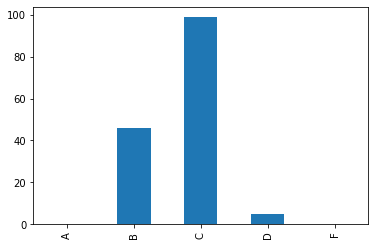

In [36]:
grade_counts = final_data["Final Grade"].value_counts().sort_index()
grade_counts.plot.bar()
plt.show()

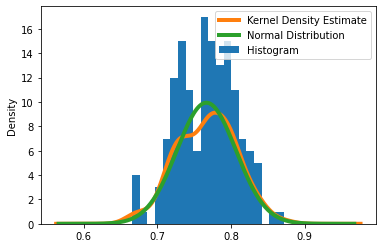

In [37]:
final_data["Final Score"].plot.hist(bins=20, label="Histogram")
final_data["Final Score"].plot.density(
    linewidth=4, label="Kernel Density Estimate")

final_mean = final_data["Final Score"].mean()
final_std = final_data["Final Score"].std()
x = np.linspace(final_mean - 5 * final_std, final_mean + 5 * final_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std)
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()